In [2]:
import keras
from keras import layers

In [3]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [4]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
 
#Let's also create a separate encoder model:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [5]:
#As well as the decoder model:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
 
#Now let's train our autoencoder to reconstruct MNIST digits.
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels #(since we're only interested in encoding/decoding the input images).
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into #vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [7]:
#Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2763 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1719 - val_loss: 0.1544
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1439 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1272 - val_loss: 0.1198
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1170 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1104 - val_loss: 0.1063
Epoch 7/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1056 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1021 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0993 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0974 - val_lo

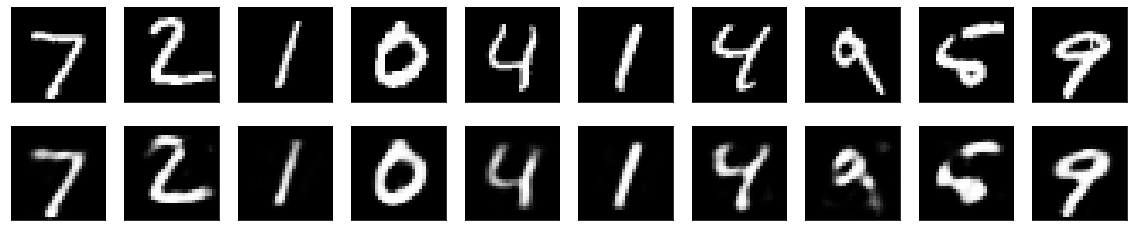

In [8]:
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()